<a href="https://colab.research.google.com/github/sharonteles/outreachy-datascience/blob/master/Pandas_e_minera%C3%A7%C3%A3o_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [97]:
!pip install PyDrive

In [98]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [99]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [100]:
downloaded = drive.CreateFile({'id':"1STqNe6Z_WHxFqUAelFszDVAuUlf-3ul4"})   # replace the id with id of file you want to access
downloaded.GetContentFile('The Open Supernova Catalog.csv')        # replace the file name with your file

In [147]:
import pandas as pd
catalogo = pd.read_csv("The Open Supernova Catalog.csv")

In [148]:
catalogo

,Name,Disc. Date,mmax,R.A.,Dec.,Type,Phot.,Spec.,Radio,X-ray
0,SN2011fe,2011/08/24,9.48,"14:03:05.711,14:03:05.76,14:03:05.81,14:03:05.80","+54:16:25.22,+54:16:25.32,+54:16:25.4,+54:16:25.3",Ia,3371.0,95.0,0.0,0.0
1,SN1987A,1987/02/24,1.90,"05:35:28.020,05:35:28,05:35:28.01,05:35:27.989...","-69:16:11.07,-69:16:11,-69:16:11.61,-69:16:11....",II Pec,3332.0,36.0,NaN,105.0
2,SN2003dh,2003/03/31,12.62,"10:44:50.030,10:44:50.01,10:44:50.009,10:44:50...","+21:31:18.15,+21:31:17.8,+21:31:17.80,+21:31:1...",Ic BL,2781.0,16.0,NaN,NaN
3,SN2013dy,2013/07/10,12.80,22:18:17.60,+40:34:09.6,Ia,2275.0,85.0,NaN,NaN
4,SN2013ej,2013/07/25,11.52,01:36:48.16,+15:45:31.0,II,1905.0,122.0,NaN,6.0
...,...,...,...,...,...,...,...,...,...,...
67535,W44,NaN,NaN,"18:56:00,18:56:11.04","+01:22,+01:20:20.76",NaN,NaN,NaN,NaN,NaN
67536,W49B,NaN,NaN,"19:11:08,19:11:01.2","+09:06,+09:05:33",NaN,NaN,NaN,NaN,NaN
67537,W50,NaN,NaN,19:12:20,+04:55,NaN,NaN,NaN,NaN,NaN
67538,W51,NaN,NaN,"19:23:50,19:23:15.6","+14:06,+14:08:35.16",NaN,NaN,NaN,NaN,NaN


In [149]:
catalogo.dtypes

Name           object
Disc. Date     object
mmax          float64
R.A.           object
Dec.           object
Type           object
Phot.         float64
Spec.         float64
Radio         float64
X-ray         float64
dtype: object

In [104]:
catalogo.mmax.describe() # type float

count    55669.000000
mean        19.352068
std          1.942570
min        -20.300000
25%         18.400000
50%         19.400000
75%         20.500000
max        177.300000
Name: mmax, dtype: float64

In [105]:
catalogo.Type.describe() # type object

count         52632
unique          143
top       Candidate
freq          27600
Name: Type, dtype: object

In [150]:
catalogo.shape

(67540, 10)

In [151]:
catalogo.index

RangeIndex(start=0, stop=67540, step=1)

In [152]:
catalogo.columns

Index(['Name', 'Disc. Date', 'mmax', 'R.A.', 'Dec.', 'Type', 'Phot.', 'Spec.',
       'Radio', 'X-ray'],
      dtype='object')

In [153]:
catalogo.count()

Name          67540
Disc. Date    63038
mmax          55669
R.A.          63767
Dec.          63767
Type          52632
Phot.         57368
Spec.          9989
Radio            98
X-ray            22
dtype: int64

In [161]:
catalogo = catalogo.drop(['X-ray'],axis=1) # Remove linhas ou colunas quando se especifica seu nome ou índice.

In [162]:
catalogo.columns

Index(['Name', 'Disc. Date', 'mmax', 'R.A.', 'Dec.', 'Type', 'Phot.', 'Spec.',
       'Radio'],
      dtype='object')

In [163]:
catalogo.drop([0, 1]) # Removendo as linhas 0 e 1 pelo índice:

,Name,Disc. Date,mmax,R.A.,Dec.,Type,Phot.,Spec.,Radio
2,SN2003dh,2003/03/31,12.62,"10:44:50.030,10:44:50.01,10:44:50.009,10:44:50...","+21:31:18.15,+21:31:17.8,+21:31:17.80,+21:31:1...",Ic BL,2781.0,16.0,NaN
3,SN2013dy,2013/07/10,12.80,22:18:17.60,+40:34:09.6,Ia,2275.0,85.0,NaN
4,SN2013ej,2013/07/25,11.52,01:36:48.16,+15:45:31.0,II,1905.0,122.0,NaN
5,CSS141118:092034+504148,2014/11/18,16.63,"09:20:34.38,09:20:34.26,09:20:34.32","+50:41:47.7,+50:41:48.4,+50:41:46.68",II P,1904.0,63.0,NaN
6,SN1993J,1993/03/28,9.91,"09:55:24.7747,09:55:24.95,09:55:25.001,09:55:2...","+69:01:13.702,+69:01:13.38,+69:01:13.01,+69:01...",IIb,1838.0,100.0,NaN
...,...,...,...,...,...,...,...,...,...
67535,W44,NaN,NaN,"18:56:00,18:56:11.04","+01:22,+01:20:20.76",NaN,NaN,NaN,NaN
67536,W49B,NaN,NaN,"19:11:08,19:11:01.2","+09:06,+09:05:33",NaN,NaN,NaN,NaN
67537,W50,NaN,NaN,19:12:20,+04:55,NaN,NaN,NaN,NaN
67538,W51,NaN,NaN,"19:23:50,19:23:15.6","+14:06,+14:08:35.16",NaN,NaN,NaN,NaN


In [164]:
catalogo.loc[67535] # Acessa um grupo de linhas ou colunas pelo nome ou por array booleano.

Name                           W44
Disc. Date                     NaN
mmax                           NaN
R.A.          18:56:00,18:56:11.04
Dec.           +01:22,+01:20:20.76
Type                           NaN
Phot.                          NaN
Spec.                          NaN
Radio                          NaN
Name: 67535, dtype: object

In [165]:
catalogo.loc[catalogo['mmax'] > 12]

,Name,Disc. Date,mmax,R.A.,Dec.,Type,Phot.,Spec.,Radio
2,SN2003dh,2003/03/31,12.620,"10:44:50.030,10:44:50.01,10:44:50.009,10:44:50...","+21:31:18.15,+21:31:17.8,+21:31:17.80,+21:31:1...",Ic BL,2781.0,16.0,NaN
3,SN2013dy,2013/07/10,12.800,22:18:17.60,+40:34:09.6,Ia,2275.0,85.0,NaN
5,CSS141118:092034+504148,2014/11/18,16.630,"09:20:34.38,09:20:34.26,09:20:34.32","+50:41:47.7,+50:41:48.4,+50:41:46.68",II P,1904.0,63.0,NaN
8,SN2002ap,2002/01/29,12.040,"01:36:23.85,01:36:23.851,01:36:23.87","+15:45:13.2,+15:45:13.21,+15:45:13.0",Ic BL,1781.0,39.0,NaN
10,SN2009ip,2012/07/24,12.010,"22:23:08.3,22:23:08.26","-28:56:52,-28:56:52.4",IIn,1581.0,240.0,NaN
...,...,...,...,...,...,...,...,...,...
61652,PS1-11xq,2011,22.367,12:17:05.76,+46:01:51.96,NaN,NaN,NaN,NaN
61653,PS1-11yd,2011,22.234,12:19:36.72,+46:01:10.2,NaN,NaN,NaN,NaN
61654,PS1-11yh,2011/05/24,21.189,"14:11:11.466,14:11:11.52","+51:59:12.63,+51:59:12.48",II P,NaN,NaN,NaN
61656,PS1-11za,2011,21.924,12:14:29.52,+47:51:13.32,NaN,NaN,NaN,NaN


In [166]:
catalogo.iloc[0] # Localiza utilizando índices de posição, que são números inteiros.

Name                                                   SN2011fe
Disc. Date                                           2011/08/24
mmax                                                       9.48
R.A.           14:03:05.711,14:03:05.76,14:03:05.81,14:03:05.80
Dec.          +54:16:25.22,+54:16:25.32,+54:16:25.4,+54:16:25.3
Type                                                         Ia
Phot.                                                      3371
Spec.                                                        95
Radio                                                         0
Name: 0, dtype: object

In [167]:
catalogo.iloc[[0]] 

,Name,Disc. Date,mmax,R.A.,Dec.,Type,Phot.,Spec.,Radio
0,SN2011fe,2011/08/24,9.48,"14:03:05.711,14:03:05.76,14:03:05.81,14:03:05.80","+54:16:25.22,+54:16:25.32,+54:16:25.4,+54:16:25.3",Ia,3371.0,95.0,0.0


In [168]:
catalogo.at[0,'Name'] # Acessa um valor único utilizando um par de nomes coluna/linha.

'SN2011fe'

In [169]:
catalogo.at[0,'Radio'] = 10
catalogo

,Name,Disc. Date,mmax,R.A.,Dec.,Type,Phot.,Spec.,Radio
0,SN2011fe,2011/08/24,9.48,"14:03:05.711,14:03:05.76,14:03:05.81,14:03:05.80","+54:16:25.22,+54:16:25.32,+54:16:25.4,+54:16:25.3",Ia,3371.0,95.0,10.0
1,SN1987A,1987/02/24,1.90,"05:35:28.020,05:35:28,05:35:28.01,05:35:27.989...","-69:16:11.07,-69:16:11,-69:16:11.61,-69:16:11....",II Pec,3332.0,36.0,NaN
2,SN2003dh,2003/03/31,12.62,"10:44:50.030,10:44:50.01,10:44:50.009,10:44:50...","+21:31:18.15,+21:31:17.8,+21:31:17.80,+21:31:1...",Ic BL,2781.0,16.0,NaN
3,SN2013dy,2013/07/10,12.80,22:18:17.60,+40:34:09.6,Ia,2275.0,85.0,NaN
4,SN2013ej,2013/07/25,11.52,01:36:48.16,+15:45:31.0,II,1905.0,122.0,NaN
...,...,...,...,...,...,...,...,...,...
67535,W44,NaN,NaN,"18:56:00,18:56:11.04","+01:22,+01:20:20.76",NaN,NaN,NaN,NaN
67536,W49B,NaN,NaN,"19:11:08,19:11:01.2","+09:06,+09:05:33",NaN,NaN,NaN,NaN
67537,W50,NaN,NaN,19:12:20,+04:55,NaN,NaN,NaN,NaN
67538,W51,NaN,NaN,"19:23:50,19:23:15.6","+14:06,+14:08:35.16",NaN,NaN,NaN,NaN


In [170]:
catalogo.iat[0, 0] # Acessa um valor único utilizando um par de índices coluna/linha.

'SN2011fe'

In [171]:
catalogo.iat[0,0] = 10
catalogo

,Name,Disc. Date,mmax,R.A.,Dec.,Type,Phot.,Spec.,Radio
0,10,2011/08/24,9.48,"14:03:05.711,14:03:05.76,14:03:05.81,14:03:05.80","+54:16:25.22,+54:16:25.32,+54:16:25.4,+54:16:25.3",Ia,3371.0,95.0,10.0
1,SN1987A,1987/02/24,1.90,"05:35:28.020,05:35:28,05:35:28.01,05:35:27.989...","-69:16:11.07,-69:16:11,-69:16:11.61,-69:16:11....",II Pec,3332.0,36.0,NaN
2,SN2003dh,2003/03/31,12.62,"10:44:50.030,10:44:50.01,10:44:50.009,10:44:50...","+21:31:18.15,+21:31:17.8,+21:31:17.80,+21:31:1...",Ic BL,2781.0,16.0,NaN
3,SN2013dy,2013/07/10,12.80,22:18:17.60,+40:34:09.6,Ia,2275.0,85.0,NaN
4,SN2013ej,2013/07/25,11.52,01:36:48.16,+15:45:31.0,II,1905.0,122.0,NaN
...,...,...,...,...,...,...,...,...,...
67535,W44,NaN,NaN,"18:56:00,18:56:11.04","+01:22,+01:20:20.76",NaN,NaN,NaN,NaN
67536,W49B,NaN,NaN,"19:11:08,19:11:01.2","+09:06,+09:05:33",NaN,NaN,NaN,NaN
67537,W50,NaN,NaN,19:12:20,+04:55,NaN,NaN,NaN,NaN
67538,W51,NaN,NaN,"19:23:50,19:23:15.6","+14:06,+14:08:35.16",NaN,NaN,NaN,NaN


In [172]:
catalogo.keys()

Index(['Name', 'Disc. Date', 'mmax', 'R.A.', 'Dec.', 'Type', 'Phot.', 'Spec.',
       'Radio'],
      dtype='object')

In [173]:
catalogo.Name.keys() #Acessa informações do objeto, que são os índices se usado em uma série ou o nome das colunas se usado em dataframe.

RangeIndex(start=0, stop=67540, step=1)

In [174]:
lista = [[0,1],[2,3],[4,5]]
dataf = pd.DataFrame(lista)
dataf

,0,1
0,0,1
1,2,3
2,4,5


In [175]:
teste = pd.DataFrame(catalogo.Name)
teste

,Name
0,10
1,SN1987A
2,SN2003dh
3,SN2013dy
4,SN2013ej
...,...
67535,W44
67536,W49B
67537,W50
67538,W51


In [176]:
catalogo = catalogo.rename(columns={'Disc. Date': 'discdate', 'R.A.': 'RA', 'Dec.':'Dec','Phot.':'Phot','Spec.':'Spec'})
catalogo.keys()

Index(['Name', 'discdate', 'mmax', 'RA', 'Dec', 'Type', 'Phot', 'Spec',
       'Radio'],
      dtype='object')

In [177]:
catalogo.tail(n=5) #Retorna as n últimas linhas.

,Name,discdate,mmax,RA,Dec,Type,Phot,Spec,Radio
67535,W44,NaN,NaN,"18:56:00,18:56:11.04","+01:22,+01:20:20.76",NaN,NaN,NaN,NaN
67536,W49B,NaN,NaN,"19:11:08,19:11:01.2","+09:06,+09:05:33",NaN,NaN,NaN,NaN
67537,W50,NaN,NaN,19:12:20,+04:55,NaN,NaN,NaN,NaN
67538,W51,NaN,NaN,"19:23:50,19:23:15.6","+14:06,+14:08:35.16",NaN,NaN,NaN,NaN
67539,W63,NaN,NaN,20:19:00,+45:30,NaN,NaN,NaN,NaN


In [178]:
catalogo.tail(n=-67535)

,Name,discdate,mmax,RA,Dec,Type,Phot,Spec,Radio
67535,W44,NaN,NaN,"18:56:00,18:56:11.04","+01:22,+01:20:20.76",NaN,NaN,NaN,NaN
67536,W49B,NaN,NaN,"19:11:08,19:11:01.2","+09:06,+09:05:33",NaN,NaN,NaN,NaN
67537,W50,NaN,NaN,19:12:20,+04:55,NaN,NaN,NaN,NaN
67538,W51,NaN,NaN,"19:23:50,19:23:15.6","+14:06,+14:08:35.16",NaN,NaN,NaN,NaN
67539,W63,NaN,NaN,20:19:00,+45:30,NaN,NaN,NaN,NaN


In [179]:
catalogo.pop('Radio') #Retorna um item o retirando do dataframe.

0        10.0
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
67535     NaN
67536     NaN
67537     NaN
67538     NaN
67539     NaN
Name: Radio, Length: 67540, dtype: float64

In [180]:
catalogo

,Name,discdate,mmax,RA,Dec,Type,Phot,Spec
0,10,2011/08/24,9.48,"14:03:05.711,14:03:05.76,14:03:05.81,14:03:05.80","+54:16:25.22,+54:16:25.32,+54:16:25.4,+54:16:25.3",Ia,3371.0,95.0
1,SN1987A,1987/02/24,1.90,"05:35:28.020,05:35:28,05:35:28.01,05:35:27.989...","-69:16:11.07,-69:16:11,-69:16:11.61,-69:16:11....",II Pec,3332.0,36.0
2,SN2003dh,2003/03/31,12.62,"10:44:50.030,10:44:50.01,10:44:50.009,10:44:50...","+21:31:18.15,+21:31:17.8,+21:31:17.80,+21:31:1...",Ic BL,2781.0,16.0
3,SN2013dy,2013/07/10,12.80,22:18:17.60,+40:34:09.6,Ia,2275.0,85.0
4,SN2013ej,2013/07/25,11.52,01:36:48.16,+15:45:31.0,II,1905.0,122.0
...,...,...,...,...,...,...,...,...
67535,W44,NaN,NaN,"18:56:00,18:56:11.04","+01:22,+01:20:20.76",NaN,NaN,NaN
67536,W49B,NaN,NaN,"19:11:08,19:11:01.2","+09:06,+09:05:33",NaN,NaN,NaN
67537,W50,NaN,NaN,19:12:20,+04:55,NaN,NaN,NaN
67538,W51,NaN,NaN,"19:23:50,19:23:15.6","+14:06,+14:08:35.16",NaN,NaN,NaN


In [181]:
data = catalogo.Spec.ffill() # Substitui os valores NaN por valores numéricos preechendo para frente (ffill) ou para trás (bfill).
data

0         95.0
1         36.0
2         16.0
3         85.0
4        122.0
         ...  
67535      1.0
67536      1.0
67537      1.0
67538      1.0
67539      1.0
Name: Spec, Length: 67540, dtype: float64

In [182]:
catalogo = catalogo.dropna() # Remove as linhas com valores indefinidos
catalogo

,Name,discdate,mmax,RA,Dec,Type,Phot,Spec
0,10,2011/08/24,9.48,"14:03:05.711,14:03:05.76,14:03:05.81,14:03:05.80","+54:16:25.22,+54:16:25.32,+54:16:25.4,+54:16:25.3",Ia,3371.0,95.0
1,SN1987A,1987/02/24,1.90,"05:35:28.020,05:35:28,05:35:28.01,05:35:27.989...","-69:16:11.07,-69:16:11,-69:16:11.61,-69:16:11....",II Pec,3332.0,36.0
2,SN2003dh,2003/03/31,12.62,"10:44:50.030,10:44:50.01,10:44:50.009,10:44:50...","+21:31:18.15,+21:31:17.8,+21:31:17.80,+21:31:1...",Ic BL,2781.0,16.0
3,SN2013dy,2013/07/10,12.80,22:18:17.60,+40:34:09.6,Ia,2275.0,85.0
4,SN2013ej,2013/07/25,11.52,01:36:48.16,+15:45:31.0,II,1905.0,122.0
...,...,...,...,...,...,...,...,...
55835,SN2020yy,2020/01/05,20.57,14:18:53.920,+63:09:45.17,IIn,1.0,1.0
55839,SN2004hf,2004/11/16,21.73,"02:32:00.14,02:32:00.139,02:32:00.143","-08:42:23.8,-08:42:23.89,-08:42:23.80,-08:42:2...",Ia,0.0,1.0
55906,SN2006ey,2006/08/27,20.47,"21:07:03.563,21:07:03.84,21:07:03.6,21:07:03.73","+00:43:23.95,+00:43:23.05,+00:43:22.87,+00:43:...",Ia,0.0,1.0
55907,SN2006fe,2006/08/27,19.84,"20:52:09.10,20:52:09.12,20:52:09.16","-00:30:39.3,-00:30:39.96,-00:30:40.0752,-00:30...",Ic,0.0,1.0


In [183]:
catalogo.dropna(axis='columns') # Remove todas as colunas onde pelo menos um elemento está indefinido.

,Name,discdate,mmax,RA,Dec,Type,Phot,Spec
0,10,2011/08/24,9.48,"14:03:05.711,14:03:05.76,14:03:05.81,14:03:05.80","+54:16:25.22,+54:16:25.32,+54:16:25.4,+54:16:25.3",Ia,3371.0,95.0
1,SN1987A,1987/02/24,1.90,"05:35:28.020,05:35:28,05:35:28.01,05:35:27.989...","-69:16:11.07,-69:16:11,-69:16:11.61,-69:16:11....",II Pec,3332.0,36.0
2,SN2003dh,2003/03/31,12.62,"10:44:50.030,10:44:50.01,10:44:50.009,10:44:50...","+21:31:18.15,+21:31:17.8,+21:31:17.80,+21:31:1...",Ic BL,2781.0,16.0
3,SN2013dy,2013/07/10,12.80,22:18:17.60,+40:34:09.6,Ia,2275.0,85.0
4,SN2013ej,2013/07/25,11.52,01:36:48.16,+15:45:31.0,II,1905.0,122.0
...,...,...,...,...,...,...,...,...
55835,SN2020yy,2020/01/05,20.57,14:18:53.920,+63:09:45.17,IIn,1.0,1.0
55839,SN2004hf,2004/11/16,21.73,"02:32:00.14,02:32:00.139,02:32:00.143","-08:42:23.8,-08:42:23.89,-08:42:23.80,-08:42:2...",Ia,0.0,1.0
55906,SN2006ey,2006/08/27,20.47,"21:07:03.563,21:07:03.84,21:07:03.6,21:07:03.73","+00:43:23.95,+00:43:23.05,+00:43:22.87,+00:43:...",Ia,0.0,1.0
55907,SN2006fe,2006/08/27,19.84,"20:52:09.10,20:52:09.12,20:52:09.16","-00:30:39.3,-00:30:39.96,-00:30:40.0752,-00:30...",Ic,0.0,1.0


In [184]:
catalogo.dropna(how='all') # Remove as linhas onde todos os elemento estão indefinidos.

,Name,discdate,mmax,RA,Dec,Type,Phot,Spec
0,10,2011/08/24,9.48,"14:03:05.711,14:03:05.76,14:03:05.81,14:03:05.80","+54:16:25.22,+54:16:25.32,+54:16:25.4,+54:16:25.3",Ia,3371.0,95.0
1,SN1987A,1987/02/24,1.90,"05:35:28.020,05:35:28,05:35:28.01,05:35:27.989...","-69:16:11.07,-69:16:11,-69:16:11.61,-69:16:11....",II Pec,3332.0,36.0
2,SN2003dh,2003/03/31,12.62,"10:44:50.030,10:44:50.01,10:44:50.009,10:44:50...","+21:31:18.15,+21:31:17.8,+21:31:17.80,+21:31:1...",Ic BL,2781.0,16.0
3,SN2013dy,2013/07/10,12.80,22:18:17.60,+40:34:09.6,Ia,2275.0,85.0
4,SN2013ej,2013/07/25,11.52,01:36:48.16,+15:45:31.0,II,1905.0,122.0
...,...,...,...,...,...,...,...,...
55835,SN2020yy,2020/01/05,20.57,14:18:53.920,+63:09:45.17,IIn,1.0,1.0
55839,SN2004hf,2004/11/16,21.73,"02:32:00.14,02:32:00.139,02:32:00.143","-08:42:23.8,-08:42:23.89,-08:42:23.80,-08:42:2...",Ia,0.0,1.0
55906,SN2006ey,2006/08/27,20.47,"21:07:03.563,21:07:03.84,21:07:03.6,21:07:03.73","+00:43:23.95,+00:43:23.05,+00:43:22.87,+00:43:...",Ia,0.0,1.0
55907,SN2006fe,2006/08/27,19.84,"20:52:09.10,20:52:09.12,20:52:09.16","-00:30:39.3,-00:30:39.96,-00:30:40.0752,-00:30...",Ic,0.0,1.0


In [185]:
catalogo.dropna(subset=['RA', 'Dec']) # Define em qual coluna procurar por valores indefinidos.

,Name,discdate,mmax,RA,Dec,Type,Phot,Spec
0,10,2011/08/24,9.48,"14:03:05.711,14:03:05.76,14:03:05.81,14:03:05.80","+54:16:25.22,+54:16:25.32,+54:16:25.4,+54:16:25.3",Ia,3371.0,95.0
1,SN1987A,1987/02/24,1.90,"05:35:28.020,05:35:28,05:35:28.01,05:35:27.989...","-69:16:11.07,-69:16:11,-69:16:11.61,-69:16:11....",II Pec,3332.0,36.0
2,SN2003dh,2003/03/31,12.62,"10:44:50.030,10:44:50.01,10:44:50.009,10:44:50...","+21:31:18.15,+21:31:17.8,+21:31:17.80,+21:31:1...",Ic BL,2781.0,16.0
3,SN2013dy,2013/07/10,12.80,22:18:17.60,+40:34:09.6,Ia,2275.0,85.0
4,SN2013ej,2013/07/25,11.52,01:36:48.16,+15:45:31.0,II,1905.0,122.0
...,...,...,...,...,...,...,...,...
55835,SN2020yy,2020/01/05,20.57,14:18:53.920,+63:09:45.17,IIn,1.0,1.0
55839,SN2004hf,2004/11/16,21.73,"02:32:00.14,02:32:00.139,02:32:00.143","-08:42:23.8,-08:42:23.89,-08:42:23.80,-08:42:2...",Ia,0.0,1.0
55906,SN2006ey,2006/08/27,20.47,"21:07:03.563,21:07:03.84,21:07:03.6,21:07:03.73","+00:43:23.95,+00:43:23.05,+00:43:22.87,+00:43:...",Ia,0.0,1.0
55907,SN2006fe,2006/08/27,19.84,"20:52:09.10,20:52:09.12,20:52:09.16","-00:30:39.3,-00:30:39.96,-00:30:40.0752,-00:30...",Ic,0.0,1.0


In [187]:
pd.concat([catalogo, teste], ignore_index=True) # une dataframes verticalmente, gerando uma nova indexação.

,Name,discdate,mmax,RA,Dec,Type,Phot,Spec
0,10,2011/08/24,9.48,"14:03:05.711,14:03:05.76,14:03:05.81,14:03:05.80","+54:16:25.22,+54:16:25.32,+54:16:25.4,+54:16:25.3",Ia,3371.0,95.0
1,SN1987A,1987/02/24,1.90,"05:35:28.020,05:35:28,05:35:28.01,05:35:27.989...","-69:16:11.07,-69:16:11,-69:16:11.61,-69:16:11....",II Pec,3332.0,36.0
2,SN2003dh,2003/03/31,12.62,"10:44:50.030,10:44:50.01,10:44:50.009,10:44:50...","+21:31:18.15,+21:31:17.8,+21:31:17.80,+21:31:1...",Ic BL,2781.0,16.0
3,SN2013dy,2013/07/10,12.80,22:18:17.60,+40:34:09.6,Ia,2275.0,85.0
4,SN2013ej,2013/07/25,11.52,01:36:48.16,+15:45:31.0,II,1905.0,122.0
...,...,...,...,...,...,...,...,...
76893,W44,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76894,W49B,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76895,W50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76896,W51,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [188]:
pd.concat([catalogo, teste], axis=1) # une dataframes horizontalmente ao logo do eixo x (adiciona colunas ao primeiro dataframe)

,Name,discdate,mmax,RA,Dec,Type,Phot,Spec,Name
0,10,2011/08/24,9.48,"14:03:05.711,14:03:05.76,14:03:05.81,14:03:05.80","+54:16:25.22,+54:16:25.32,+54:16:25.4,+54:16:25.3",Ia,3371.0,95.0,10
1,SN1987A,1987/02/24,1.90,"05:35:28.020,05:35:28,05:35:28.01,05:35:27.989...","-69:16:11.07,-69:16:11,-69:16:11.61,-69:16:11....",II Pec,3332.0,36.0,SN1987A
2,SN2003dh,2003/03/31,12.62,"10:44:50.030,10:44:50.01,10:44:50.009,10:44:50...","+21:31:18.15,+21:31:17.8,+21:31:17.80,+21:31:1...",Ic BL,2781.0,16.0,SN2003dh
3,SN2013dy,2013/07/10,12.80,22:18:17.60,+40:34:09.6,Ia,2275.0,85.0,SN2013dy
4,SN2013ej,2013/07/25,11.52,01:36:48.16,+15:45:31.0,II,1905.0,122.0,SN2013ej
...,...,...,...,...,...,...,...,...,...
67535,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,W44
67536,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,W49B
67537,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,W50
67538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,W51


In [189]:
catalogo

,Name,discdate,mmax,RA,Dec,Type,Phot,Spec
0,10,2011/08/24,9.48,"14:03:05.711,14:03:05.76,14:03:05.81,14:03:05.80","+54:16:25.22,+54:16:25.32,+54:16:25.4,+54:16:25.3",Ia,3371.0,95.0
1,SN1987A,1987/02/24,1.90,"05:35:28.020,05:35:28,05:35:28.01,05:35:27.989...","-69:16:11.07,-69:16:11,-69:16:11.61,-69:16:11....",II Pec,3332.0,36.0
2,SN2003dh,2003/03/31,12.62,"10:44:50.030,10:44:50.01,10:44:50.009,10:44:50...","+21:31:18.15,+21:31:17.8,+21:31:17.80,+21:31:1...",Ic BL,2781.0,16.0
3,SN2013dy,2013/07/10,12.80,22:18:17.60,+40:34:09.6,Ia,2275.0,85.0
4,SN2013ej,2013/07/25,11.52,01:36:48.16,+15:45:31.0,II,1905.0,122.0
...,...,...,...,...,...,...,...,...
55835,SN2020yy,2020/01/05,20.57,14:18:53.920,+63:09:45.17,IIn,1.0,1.0
55839,SN2004hf,2004/11/16,21.73,"02:32:00.14,02:32:00.139,02:32:00.143","-08:42:23.8,-08:42:23.89,-08:42:23.80,-08:42:2...",Ia,0.0,1.0
55906,SN2006ey,2006/08/27,20.47,"21:07:03.563,21:07:03.84,21:07:03.6,21:07:03.73","+00:43:23.95,+00:43:23.05,+00:43:22.87,+00:43:...",Ia,0.0,1.0
55907,SN2006fe,2006/08/27,19.84,"20:52:09.10,20:52:09.12,20:52:09.16","-00:30:39.3,-00:30:39.96,-00:30:40.0752,-00:30...",Ic,0.0,1.0


In [190]:
import numpy as np
df = pd.DataFrame(catalogo.Spec)
df

,Spec
0,95.0
1,36.0
2,16.0
3,85.0
4,122.0
...,...
55835,1.0
55839,1.0
55906,1.0
55907,1.0


In [191]:
df.apply(np.sum,axis=0)

Spec    22801.0
dtype: float64

In [192]:
df.apply(np.sum,axis=1)

0         95.0
1         36.0
2         16.0
3         85.0
4        122.0
         ...  
55835      1.0
55839      1.0
55906      1.0
55907      1.0
55910      1.0
Length: 9358, dtype: float64

In [193]:
catalogo

,Name,discdate,mmax,RA,Dec,Type,Phot,Spec
0,10,2011/08/24,9.48,"14:03:05.711,14:03:05.76,14:03:05.81,14:03:05.80","+54:16:25.22,+54:16:25.32,+54:16:25.4,+54:16:25.3",Ia,3371.0,95.0
1,SN1987A,1987/02/24,1.90,"05:35:28.020,05:35:28,05:35:28.01,05:35:27.989...","-69:16:11.07,-69:16:11,-69:16:11.61,-69:16:11....",II Pec,3332.0,36.0
2,SN2003dh,2003/03/31,12.62,"10:44:50.030,10:44:50.01,10:44:50.009,10:44:50...","+21:31:18.15,+21:31:17.8,+21:31:17.80,+21:31:1...",Ic BL,2781.0,16.0
3,SN2013dy,2013/07/10,12.80,22:18:17.60,+40:34:09.6,Ia,2275.0,85.0
4,SN2013ej,2013/07/25,11.52,01:36:48.16,+15:45:31.0,II,1905.0,122.0
...,...,...,...,...,...,...,...,...
55835,SN2020yy,2020/01/05,20.57,14:18:53.920,+63:09:45.17,IIn,1.0,1.0
55839,SN2004hf,2004/11/16,21.73,"02:32:00.14,02:32:00.139,02:32:00.143","-08:42:23.8,-08:42:23.89,-08:42:23.80,-08:42:2...",Ia,0.0,1.0
55906,SN2006ey,2006/08/27,20.47,"21:07:03.563,21:07:03.84,21:07:03.6,21:07:03.73","+00:43:23.95,+00:43:23.05,+00:43:22.87,+00:43:...",Ia,0.0,1.0
55907,SN2006fe,2006/08/27,19.84,"20:52:09.10,20:52:09.12,20:52:09.16","-00:30:39.3,-00:30:39.96,-00:30:40.0752,-00:30...",Ic,0.0,1.0


In [195]:
catalogo.loc['indice'] = ['nome', 'data', 'mag aparente', 'ra','dec','tipo','fot','espec'] # criar linha
catalogo

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Name,discdate,mmax,RA,Dec,Type,Phot,Spec
0,10,2011/08/24,9.48,"14:03:05.711,14:03:05.76,14:03:05.81,14:03:05.80","+54:16:25.22,+54:16:25.32,+54:16:25.4,+54:16:25.3",Ia,3371,95
1,SN1987A,1987/02/24,1.9,"05:35:28.020,05:35:28,05:35:28.01,05:35:27.989...","-69:16:11.07,-69:16:11,-69:16:11.61,-69:16:11....",II Pec,3332,36
2,SN2003dh,2003/03/31,12.62,"10:44:50.030,10:44:50.01,10:44:50.009,10:44:50...","+21:31:18.15,+21:31:17.8,+21:31:17.80,+21:31:1...",Ic BL,2781,16
3,SN2013dy,2013/07/10,12.8,22:18:17.60,+40:34:09.6,Ia,2275,85
4,SN2013ej,2013/07/25,11.52,01:36:48.16,+15:45:31.0,II,1905,122
...,...,...,...,...,...,...,...,...
55839,SN2004hf,2004/11/16,21.73,"02:32:00.14,02:32:00.139,02:32:00.143","-08:42:23.8,-08:42:23.89,-08:42:23.80,-08:42:2...",Ia,0,1
55906,SN2006ey,2006/08/27,20.47,"21:07:03.563,21:07:03.84,21:07:03.6,21:07:03.73","+00:43:23.95,+00:43:23.05,+00:43:22.87,+00:43:...",Ia,0,1
55907,SN2006fe,2006/08/27,19.84,"20:52:09.10,20:52:09.12,20:52:09.16","-00:30:39.3,-00:30:39.96,-00:30:40.0752,-00:30...",Ic,0,1
55910,SN2007sj,2007/11/17,18.87,"00:10:39.63,00:10:39.6336,00:10:39.6192","-00:03:10.2,-00:03:10.1916,-00:03:10.53",Ib/c,0,1


In [197]:
catalogo.iloc[1] = ['nome1', 'data1', 'mag aparente1', 'ra1','dec1','tipo1','fot1','espec1'] # criar linha em posição qualquer
catalogo

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Name,discdate,mmax,RA,Dec,Type,Phot,Spec
0,10,2011/08/24,9.48,"14:03:05.711,14:03:05.76,14:03:05.81,14:03:05.80","+54:16:25.22,+54:16:25.32,+54:16:25.4,+54:16:25.3",Ia,3371,95
1,nome1,data1,mag aparente1,ra1,dec1,tipo1,fot1,espec1
2,SN2003dh,2003/03/31,12.62,"10:44:50.030,10:44:50.01,10:44:50.009,10:44:50...","+21:31:18.15,+21:31:17.8,+21:31:17.80,+21:31:1...",Ic BL,2781,16
3,SN2013dy,2013/07/10,12.8,22:18:17.60,+40:34:09.6,Ia,2275,85
4,SN2013ej,2013/07/25,11.52,01:36:48.16,+15:45:31.0,II,1905,122
...,...,...,...,...,...,...,...,...
55839,SN2004hf,2004/11/16,21.73,"02:32:00.14,02:32:00.139,02:32:00.143","-08:42:23.8,-08:42:23.89,-08:42:23.80,-08:42:2...",Ia,0,1
55906,SN2006ey,2006/08/27,20.47,"21:07:03.563,21:07:03.84,21:07:03.6,21:07:03.73","+00:43:23.95,+00:43:23.05,+00:43:22.87,+00:43:...",Ia,0,1
55907,SN2006fe,2006/08/27,19.84,"20:52:09.10,20:52:09.12,20:52:09.16","-00:30:39.3,-00:30:39.96,-00:30:40.0752,-00:30...",Ic,0,1
55910,SN2007sj,2007/11/17,18.87,"00:10:39.63,00:10:39.6336,00:10:39.6192","-00:03:10.2,-00:03:10.1916,-00:03:10.53",Ib/c,0,1


In [208]:
numeros = np.arange(1,9360,step=1)
catalogo['nova coluna'] = numeros # criar coluna
catalogo

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Name,discdate,mmax,RA,Dec,Type,Phot,Spec,nova coluna
0,10,1,9.48,"14:03:05.711,14:03:05.76,14:03:05.81,14:03:05.80","+54:16:25.22,+54:16:25.32,+54:16:25.4,+54:16:25.3",Ia,3371,95,1
1,nome1,2,mag aparente1,ra1,dec1,tipo1,fot1,espec1,2
2,SN2003dh,3,12.62,"10:44:50.030,10:44:50.01,10:44:50.009,10:44:50...","+21:31:18.15,+21:31:17.8,+21:31:17.80,+21:31:1...",Ic BL,2781,16,3
3,SN2013dy,4,12.8,22:18:17.60,+40:34:09.6,Ia,2275,85,4
4,SN2013ej,5,11.52,01:36:48.16,+15:45:31.0,II,1905,122,5
...,...,...,...,...,...,...,...,...,...
55839,SN2004hf,9355,21.73,"02:32:00.14,02:32:00.139,02:32:00.143","-08:42:23.8,-08:42:23.89,-08:42:23.80,-08:42:2...",Ia,0,1,9355
55906,SN2006ey,9356,20.47,"21:07:03.563,21:07:03.84,21:07:03.6,21:07:03.73","+00:43:23.95,+00:43:23.05,+00:43:22.87,+00:43:...",Ia,0,1,9356
55907,SN2006fe,9357,19.84,"20:52:09.10,20:52:09.12,20:52:09.16","-00:30:39.3,-00:30:39.96,-00:30:40.0752,-00:30...",Ic,0,1,9357
55910,SN2007sj,9358,18.87,"00:10:39.63,00:10:39.6336,00:10:39.6192","-00:03:10.2,-00:03:10.1916,-00:03:10.53",Ib/c,0,1,9358


In [239]:
catalogo = catalogo.drop([0,1]) #removendo as duas primeiras linhas do catalogo
catalogo = catalogo.drop(['indice']) 
catalogo = catalogo.drop(['nova coluna'],axis=1)

In [240]:
catalogo

,Name,discdate,mmax,RA,Dec,Type,Phot,Spec
2,SN2003dh,3,12.62,"10:44:50.030,10:44:50.01,10:44:50.009,10:44:50...","+21:31:18.15,+21:31:17.8,+21:31:17.80,+21:31:1...",Ic BL,2781,16
3,SN2013dy,4,12.8,22:18:17.60,+40:34:09.6,Ia,2275,85
4,SN2013ej,5,11.52,01:36:48.16,+15:45:31.0,II,1905,122
5,CSS141118:092034+504148,6,16.63,"09:20:34.38,09:20:34.26,09:20:34.32","+50:41:47.7,+50:41:48.4,+50:41:46.68",II P,1904,63
6,SN1993J,7,9.91,"09:55:24.7747,09:55:24.95,09:55:25.001,09:55:2...","+69:01:13.702,+69:01:13.38,+69:01:13.01,+69:01...",IIb,1838,100
...,...,...,...,...,...,...,...,...
55834,SN2020vz,9353,21.05,07:34:32.286,+08:47:16.85,IIn,1,1
55835,SN2020yy,9354,20.57,14:18:53.920,+63:09:45.17,IIn,1,1
55839,SN2004hf,9355,21.73,"02:32:00.14,02:32:00.139,02:32:00.143","-08:42:23.8,-08:42:23.89,-08:42:23.80,-08:42:2...",Ia,0,1
55906,SN2006ey,9356,20.47,"21:07:03.563,21:07:03.84,21:07:03.6,21:07:03.73","+00:43:23.95,+00:43:23.05,+00:43:22.87,+00:43:...",Ia,0,1


In [241]:
catalogo.sort_values(by=['Phot'],ascending=False)

,Name,discdate,mmax,RA,Dec,Type,Phot,Spec
2,SN2003dh,3,12.62,"10:44:50.030,10:44:50.01,10:44:50.009,10:44:50...","+21:31:18.15,+21:31:17.8,+21:31:17.80,+21:31:1...",Ic BL,2781,16
3,SN2013dy,4,12.8,22:18:17.60,+40:34:09.6,Ia,2275,85
4,SN2013ej,5,11.52,01:36:48.16,+15:45:31.0,II,1905,122
5,CSS141118:092034+504148,6,16.63,"09:20:34.38,09:20:34.26,09:20:34.32","+50:41:47.7,+50:41:48.4,+50:41:46.68",II P,1904,63
6,SN1993J,7,9.91,"09:55:24.7747,09:55:24.95,09:55:25.001,09:55:2...","+69:01:13.702,+69:01:13.38,+69:01:13.01,+69:01...",IIb,1838,100
...,...,...,...,...,...,...,...,...
33215,iPTF14axt,7738,18.2,16:15:41.37,+31:45:14.9,Ia,1,1
33216,iPTF14axv,7739,19.2,18:01:51.29,+67:02:27.4,Ia,1,1
55839,SN2004hf,9355,21.73,"02:32:00.14,02:32:00.139,02:32:00.143","-08:42:23.8,-08:42:23.89,-08:42:23.80,-08:42:2...",Ia,0,1
55906,SN2006ey,9356,20.47,"21:07:03.563,21:07:03.84,21:07:03.6,21:07:03.73","+00:43:23.95,+00:43:23.05,+00:43:22.87,+00:43:...",Ia,0,1


In [242]:
catalogo.Phot.mean()

29.56889363976483

In [243]:
# filtrar valores positivos da espectroscopia e fotometria
selecao = (catalogo['Spec'] > 0) & (catalogo['Phot'] > 0)
catalogo_filtro = catalogo[selecao]
catalogo_filtro

,Name,discdate,mmax,RA,Dec,Type,Phot,Spec
2,SN2003dh,3,12.62,"10:44:50.030,10:44:50.01,10:44:50.009,10:44:50...","+21:31:18.15,+21:31:17.8,+21:31:17.80,+21:31:1...",Ic BL,2781,16
3,SN2013dy,4,12.8,22:18:17.60,+40:34:09.6,Ia,2275,85
4,SN2013ej,5,11.52,01:36:48.16,+15:45:31.0,II,1905,122
5,CSS141118:092034+504148,6,16.63,"09:20:34.38,09:20:34.26,09:20:34.32","+50:41:47.7,+50:41:48.4,+50:41:46.68",II P,1904,63
6,SN1993J,7,9.91,"09:55:24.7747,09:55:24.95,09:55:25.001,09:55:2...","+69:01:13.702,+69:01:13.38,+69:01:13.01,+69:01...",IIb,1838,100
...,...,...,...,...,...,...,...,...
55717,SN2020rdt,9350,18.09,00:11:02.824,-25:26:29.23,Ia,1,1
55832,SN2020vw,9351,21.22,07:05:49.022,+13:52:13.91,Ia,1,1
55833,SN2020vy,9352,21.19,07:35:17.494,+10:04:45.13,Ia,1,1
55834,SN2020vz,9353,21.05,07:34:32.286,+08:47:16.85,IIn,1,1


In [245]:
# filtrar para apenas um tipo de estrela

selecao = catalogo['Type'] == 'Ia'
catalogo_ia = catalogo[selecao]
catalogo_ia

,Name,discdate,mmax,RA,Dec,Type,Phot,Spec
2,SN2003dh,3,12.62,"10:44:50.030,10:44:50.01,10:44:50.009,10:44:50...","+21:31:18.15,+21:31:17.8,+21:31:17.80,+21:31:1...",Ia,2781,16
3,SN2013dy,4,12.8,22:18:17.60,+40:34:09.6,Ia,2275,85
4,SN2013ej,5,11.52,01:36:48.16,+15:45:31.0,Ia,1905,122
5,CSS141118:092034+504148,6,16.63,"09:20:34.38,09:20:34.26,09:20:34.32","+50:41:47.7,+50:41:48.4,+50:41:46.68",Ia,1904,63
6,SN1993J,7,9.91,"09:55:24.7747,09:55:24.95,09:55:25.001,09:55:2...","+69:01:13.702,+69:01:13.38,+69:01:13.01,+69:01...",Ia,1838,100
...,...,...,...,...,...,...,...,...
55834,SN2020vz,9353,21.05,07:34:32.286,+08:47:16.85,Ia,1,1
55835,SN2020yy,9354,20.57,14:18:53.920,+63:09:45.17,Ia,1,1
55839,SN2004hf,9355,21.73,"02:32:00.14,02:32:00.139,02:32:00.143","-08:42:23.8,-08:42:23.89,-08:42:23.80,-08:42:2...",Ia,0,1
55906,SN2006ey,9356,20.47,"21:07:03.563,21:07:03.84,21:07:03.6,21:07:03.73","+00:43:23.95,+00:43:23.05,+00:43:22.87,+00:43:...",Ia,0,1


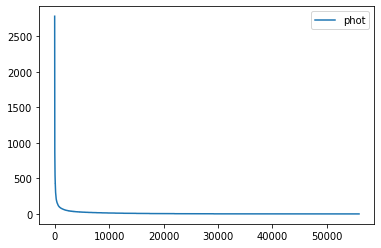

In [274]:
import matplotlib.pyplot as plt
plt.plot(catalogo_ia.Phot,label='phot')
plt.legend()
plt.show()

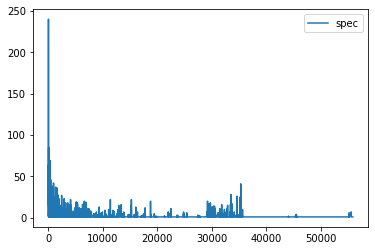

In [255]:
plt.plot(catalogo_ia.Spec,label='spec')
plt.legend()
plt.show()

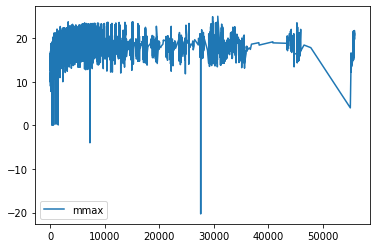

In [265]:
plt.plot(catalogo_ia.mmax,label='mmax')
plt.legend()
plt.show()


In [271]:
# retirando valores muito distantes do meio de distribuição

selecao = (catalogo_ia['mmax'] > 0) & (catalogo_ia['Spec'] < 100) & (catalogo_ia['Phot'] > 10)
catalogo_ia_novo = catalogo_ia[selecao]
catalogo_ia_novo

,Name,discdate,mmax,RA,Dec,Type,Phot,Spec
2,SN2003dh,3,12.62,"10:44:50.030,10:44:50.01,10:44:50.009,10:44:50...","+21:31:18.15,+21:31:17.8,+21:31:17.80,+21:31:1...",Ia,2781,16
3,SN2013dy,4,12.8,22:18:17.60,+40:34:09.6,Ia,2275,85
5,CSS141118:092034+504148,6,16.63,"09:20:34.38,09:20:34.26,09:20:34.32","+50:41:47.7,+50:41:48.4,+50:41:46.68",Ia,1904,63
8,SN2002ap,9,12.04,"01:36:23.85,01:36:23.851,01:36:23.87","+15:45:13.2,+15:45:13.21,+15:45:13.0",Ia,1781,39
9,SN2012aw,10,11.96,"10:43:53.735,10:43:53.752,10:43:53.76,10:43:53.72","+11:40:17.63,+11:40:17.89,+11:40:17.9,+11:40:17.7",Ia,1620,57
...,...,...,...,...,...,...,...,...
11825,SN2020orf,3408,18.71,"15:49:43.054,15:49:43.2","+38:59:42.24,+38:59:42.36",Ia,11,1
11826,SN2020ppe,3409,14.95,"00:39:35.979,00:39:35.974,00:39:35.9688","+06:39:50.80,+06:39:50.832,+06:39:50.796",Ia,11,1
11827,SN2020pz,3410,18.66,"03:39:39.506,03:39:39.528","+07:18:05.86,+07:18:05.796",Ia,11,1
11828,SN2020qic,3411,18.4,"00:15:05.611,00:15:05.604","+43:20:35.64,+43:20:35.88",Ia,11,1


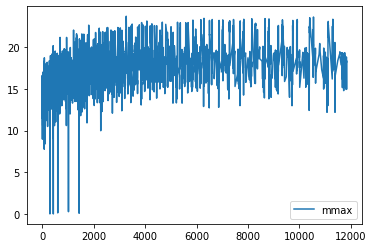

In [276]:
plt.plot(catalogo_ia_novo.mmax,label='mmax')
plt.legend()
plt.show()


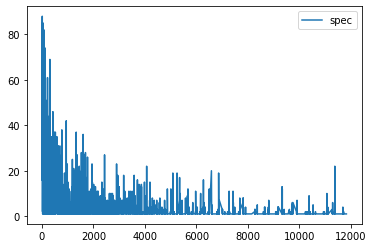

In [277]:
plt.plot(catalogo_ia_novo.Spec,label='spec')
plt.legend()
plt.show()

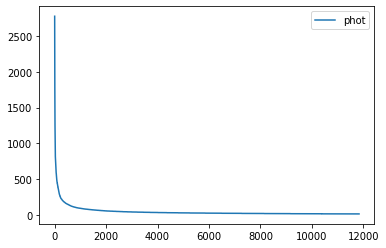

In [279]:
plt.plot(catalogo_ia_novo.Phot,label='phot')
plt.legend()
plt.show()